In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from in2stellar import Tracks, DenseNetworkGrid, set_seed
from interstellar import Tracks, DenseNetworkGrid, set_seed
%matplotlib inline

Load tracks with new MLT 2.5 grid

In [5]:
path = '/rds/projects/d/daviesgr-cartography/mesa_grid/grid2_zams_agb/simple_grid_alex_validation/'

In [3]:
tracks = Tracks()

In [4]:
tracks.add_metadata(path)
tracks.get_metadata()

,file_path,m,Y,FeH,MLT,ov,dif
0,/rds/projects/d/daviesgr-cartography/mesa_grid...,0.955,0.29,0.15,1.4,0.0,1
1,/rds/projects/d/daviesgr-cartography/mesa_grid...,1.035,0.33,0.05,1.6,0.0,1
2,/rds/projects/d/daviesgr-cartography/mesa_grid...,1.035,0.27,-0.05,1.6,0.0,1
3,/rds/projects/d/daviesgr-cartography/mesa_grid...,1.195,0.33,-0.25,2.4,0.0,1
4,/rds/projects/d/daviesgr-cartography/mesa_grid...,0.915,0.33,0.35,1.4,0.0,1
...,...,...,...,...,...,...,...
4373,/rds/projects/d/daviesgr-cartography/mesa_grid...,1.235,0.25,-0.25,1.8,0.0,1
4374,/rds/projects/d/daviesgr-cartography/mesa_grid...,1.115,0.27,-0.05,2.4,0.0,1
4375,/rds/projects/d/daviesgr-cartography/mesa_grid...,1.195,0.33,0.35,2.0,0.0,1
4376,/rds/projects/d/daviesgr-cartography/mesa_grid...,0.795,0.25,-0.15,2.4,0.0,1


In [6]:
from interstellar.tracks import DATA_COLS

print(DATA_COLS)

['initial_mass', 'initial_Yinit', 'initial_feh', 'initial_MLT', 'evol_stage', 'star_mass', 'star_age', 'frac_age', 'effective_T', 'log_g', 'luminosity', 'radius', 'star_feh', 'delta_nu_fit']


In [7]:
cols = DATA_COLS + ['surface_he4', 'surface_Z', 'initial_Zinit']
print(cols)

['initial_mass', 'initial_Yinit', 'initial_feh', 'initial_MLT', 'evol_stage', 'star_mass', 'star_age', 'frac_age', 'effective_T', 'log_g', 'luminosity', 'radius', 'star_feh', 'delta_nu_fit', 'surface_he4', 'surface_Z', 'initial_Zinit']


In [8]:
tracks.load_data(usecols=cols)
tracks._data.head()

,evol_stage,initial_mass,initial_Yinit,initial_Zinit,initial_feh,initial_MLT,star_mass,star_age,frac_age,effective_T,luminosity,radius,log_g,surface_he4,surface_Z,star_feh,delta_nu_fit
0,0,0.955,0.29,0.017696,0.15,1.4,0.955,0.000151,0.000016,4091.413551,6.191084,4.959015,3.027102,0.289959,0.017695,0.149870,11.180962
1,0,0.955,0.29,0.017696,0.15,1.4,0.955,0.000157,0.000016,4094.301169,6.037493,4.890211,3.039238,0.289960,0.017695,0.149881,11.422182
2,0,0.955,0.29,0.017696,0.15,1.4,0.955,0.000161,0.000017,4096.363344,5.920084,4.837554,3.048641,0.289961,0.017696,0.149893,11.612584
3,0,0.955,0.29,0.017696,0.15,1.4,0.955,0.000165,0.000017,4097.961504,5.829973,4.796852,3.055980,0.289962,0.017696,0.149905,11.763313
4,0,0.955,0.29,0.017696,0.15,1.4,0.955,0.000168,0.000017,4099.218893,5.758983,4.764634,3.061834,0.289963,0.017697,0.149917,11.885010


Note, evo_stage incorrectly defined. Instead we choose to cut the data given a fractional age above 0.01

In [9]:
condition = tracks.get_data('frac_age') > 0.01
tracks.select_data(condition)

,evol_stage,initial_mass,initial_Yinit,initial_Zinit,initial_feh,initial_MLT,star_mass,star_age,frac_age,effective_T,luminosity,radius,log_g,surface_he4,surface_Z,star_feh,delta_nu_fit
433,1,0.955,0.29,0.017696,0.15,1.4,0.955000,0.101533,0.010515,5340.606384,0.601833,0.907436,4.502261,0.289404,0.017670,0.148902,153.647057
434,1,0.955,0.29,0.017696,0.15,1.4,0.955000,0.113827,0.011788,5342.034121,0.603564,0.908254,4.501479,0.289308,0.017665,0.148715,153.442566
435,1,0.955,0.29,0.017696,0.15,1.4,0.955000,0.128580,0.013316,5343.299951,0.605240,0.909083,4.500686,0.289194,0.017659,0.148491,153.236003
436,1,0.955,0.29,0.017696,0.15,1.4,0.955000,0.146284,0.015149,5344.379955,0.606864,0.909934,4.499873,0.289055,0.017652,0.148218,153.024898
437,1,0.955,0.29,0.017696,0.15,1.4,0.955000,0.167529,0.017350,5345.308018,0.608473,0.910823,4.499025,0.288889,0.017643,0.147893,152.805415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4496162,2,1.035,0.25,0.014925,0.05,2.4,1.031506,11.207830,1.334238,5035.785966,4.005510,2.633014,3.610455,0.250462,0.014687,0.043985,31.994494
4496163,2,1.035,0.25,0.014925,0.05,2.4,1.031500,11.209833,1.334476,5035.209763,4.028955,2.641313,3.607719,0.250462,0.014687,0.043985,31.847615
4496164,2,1.035,0.25,0.014925,0.05,2.4,1.031492,11.212238,1.334762,5034.714012,4.056208,2.650753,3.604616,0.250691,0.014689,0.044183,31.676420
4496165,2,1.035,0.25,0.014925,0.05,2.4,1.031485,11.214206,1.334997,5034.371884,4.078473,2.658380,3.602118,0.250925,0.014691,0.044386,31.522985


In [10]:
tracks.select_data(condition, inplace=True)

In [11]:
x_cols = ['frac_age', 'initial_mass', 'initial_MLT', 'initial_feh', 'initial_Yinit', 'initial_Zinit']
y_cols = ['star_age', 'effective_T', 'radius', 'delta_nu_fit', 'star_feh', 'surface_he4', 'surface_Z']

## Preprocessing

### Gradient

We will not be using all the data in training, because we want to have preference to data where there is high change it observables. A simple way to do this is to calculate the gradient in logg and teff for each track. We may then use this as the weights when randomly sampling the full set of tracks. For this to be effective, we need to sample a smaller number of models then the total, effectively dropping points where the gradient is low since these will be more easily learnt by the neural network.

In [12]:
def gradient(track, logg_sun=4.44, teff_sun=5777.0):
    return ((np.gradient(track['effective_T'] / teff_sun))**2.0 + \
                  (np.gradient(track['log_g'] / logg_sun))**2.0)**0.5

In [13]:
def frac_evol(track):
    return 1.0 + (track['star_age'] - track['star_age'].min()) / \
           (track['star_age'].max() - track['star_age'].min())

In [14]:
tracks._data.loc[tracks._data.frac_age<=1.0, 'frac_evol'] = tracks._data.loc[tracks._data.frac_age<=1.0, 'frac_age']

In [15]:
grouped = tracks._data.groupby(by=['initial_mass', 'initial_MLT', 'initial_feh', 'initial_Yinit'])
cond = tracks._data.frac_age>1.0
for name, group in grouped:
    tracks._data.loc[group.index, 'gradient'] = gradient(group)
    cond = group.frac_age>1.0
    tracks._data.loc[group[cond].index, 'frac_evol'] = frac_evol(group.loc[cond])

In [17]:
tracks._data.head()

,evol_stage,initial_mass,initial_Yinit,initial_Zinit,initial_feh,initial_MLT,star_mass,star_age,frac_age,effective_T,luminosity,radius,log_g,surface_he4,surface_Z,star_feh,delta_nu_fit,frac_evol,gradient
433,1,0.955,0.29,0.017696,0.15,1.4,0.955,0.101533,0.010515,5340.606384,0.601833,0.907436,4.502261,0.289404,0.017670,0.148902,153.647057,0.010515,0.000304
434,1,0.955,0.29,0.017696,0.15,1.4,0.955,0.113827,0.011788,5342.034121,0.603564,0.908254,4.501479,0.289308,0.017665,0.148715,153.442566,0.011788,0.000293
435,1,0.955,0.29,0.017696,0.15,1.4,0.955,0.128580,0.013316,5343.299951,0.605240,0.909083,4.500686,0.289194,0.017659,0.148491,153.236003,0.013316,0.000272
436,1,0.955,0.29,0.017696,0.15,1.4,0.955,0.146284,0.015149,5344.379955,0.606864,0.909934,4.499873,0.289055,0.017652,0.148218,153.024898,0.015149,0.000255
437,1,0.955,0.29,0.017696,0.15,1.4,0.955,0.167529,0.017350,5345.308018,0.608473,0.910823,4.499025,0.288889,0.017643,0.147893,152.805415,0.017350,0.000250


Below we can see many points have a small gradient.

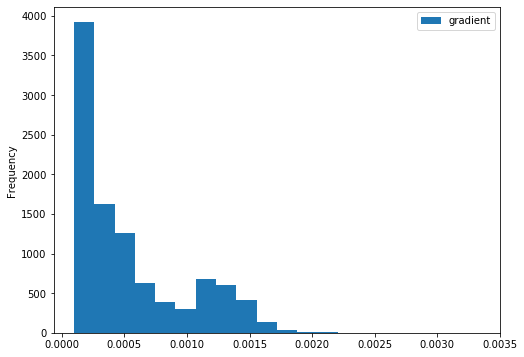

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))
tracks._data.sample(n=10000).plot(kind='hist', ax=ax, y='gradient', bins=20)

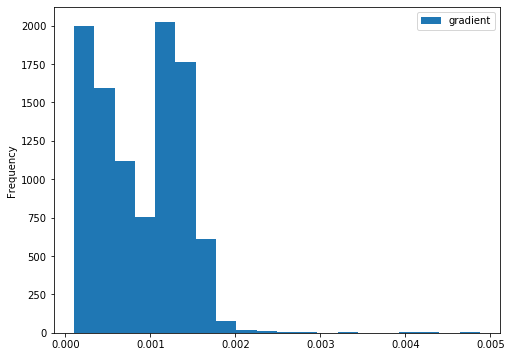

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))
tracks._data.sample(n=10000, weights='gradient').plot(kind='hist', ax=ax, y='gradient', bins=20)

In [20]:
print('Length = ', len(tracks._data))

Length =  2604247


In [21]:
tracks._data.head()

,evol_stage,initial_mass,initial_Yinit,initial_Zinit,initial_feh,initial_MLT,star_mass,star_age,frac_age,effective_T,luminosity,radius,log_g,surface_he4,surface_Z,star_feh,delta_nu_fit,frac_evol,gradient
433,1,0.955,0.29,0.017696,0.15,1.4,0.955,0.101533,0.010515,5340.606384,0.601833,0.907436,4.502261,0.289404,0.017670,0.148902,153.647057,0.010515,0.000304
434,1,0.955,0.29,0.017696,0.15,1.4,0.955,0.113827,0.011788,5342.034121,0.603564,0.908254,4.501479,0.289308,0.017665,0.148715,153.442566,0.011788,0.000293
435,1,0.955,0.29,0.017696,0.15,1.4,0.955,0.128580,0.013316,5343.299951,0.605240,0.909083,4.500686,0.289194,0.017659,0.148491,153.236003,0.013316,0.000272
436,1,0.955,0.29,0.017696,0.15,1.4,0.955,0.146284,0.015149,5344.379955,0.606864,0.909934,4.499873,0.289055,0.017652,0.148218,153.024898,0.015149,0.000255
437,1,0.955,0.29,0.017696,0.15,1.4,0.955,0.167529,0.017350,5345.308018,0.608473,0.910823,4.499025,0.288889,0.017643,0.147893,152.805415,0.017350,0.000250


In [22]:
tracks._data.drop(columns='star_mass', inplace=True)  # Drop star mass as not needed here

Reduce size by converting to 32-bit float.

In [23]:
float_cols = tracks._data.select_dtypes(float).columns

tracks._data[float_cols] = tracks._data.loc[:, float_cols].astype(np.float32)

In [24]:
tracks._data['initial_mass']

433        0.955
434        0.955
435        0.955
436        0.955
437        0.955
           ...  
4496162    1.035
4496163    1.035
4496164    1.035
4496165    1.035
4496166    1.035
Name: initial_mass, Length: 2604247, dtype: float32

In [25]:
tracks.name = 'tracks_04c_test'

In [27]:
save_path = f'/rds/projects/d/daviesgr-alex-phd/interstellar_data/{tracks.name}'

tracks.save(save_path)